# Version 2

Welcome to Neural Network Quest!
Your mission: guide your signal from an input neuron to the target output neuron.
Target Output Neuron: O0
At each step, choose a connection. Your activation gets multiplied by the connection's weight.
Keep your activation above 0.2 to survive the journey.

Input Neurons:
1. I0
2. I1
3. I2


Choose your starting input neuron (enter number):  2


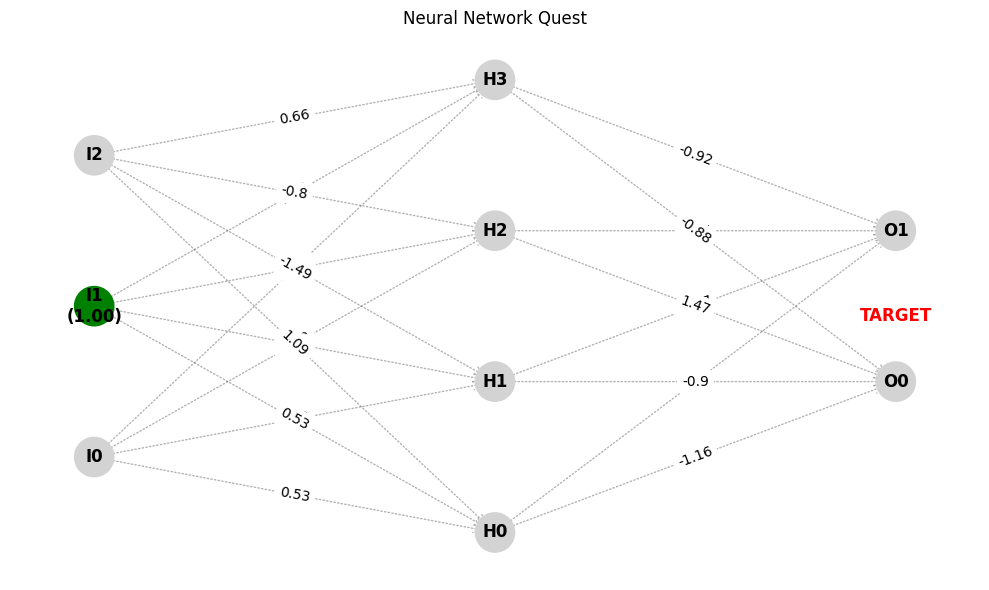


Current node: I1 with activation: 1.00
Choose one of the connections to a node in the hidden layer:
1. To H0 with weight 0.53
2. To H1 with weight 1.01
3. To H2 with weight 0.7
4. To H3 with weight 1.04


Enter the number of your chosen connection:  3


After moving along the connection with weight 0.7, your activation is now 0.70.


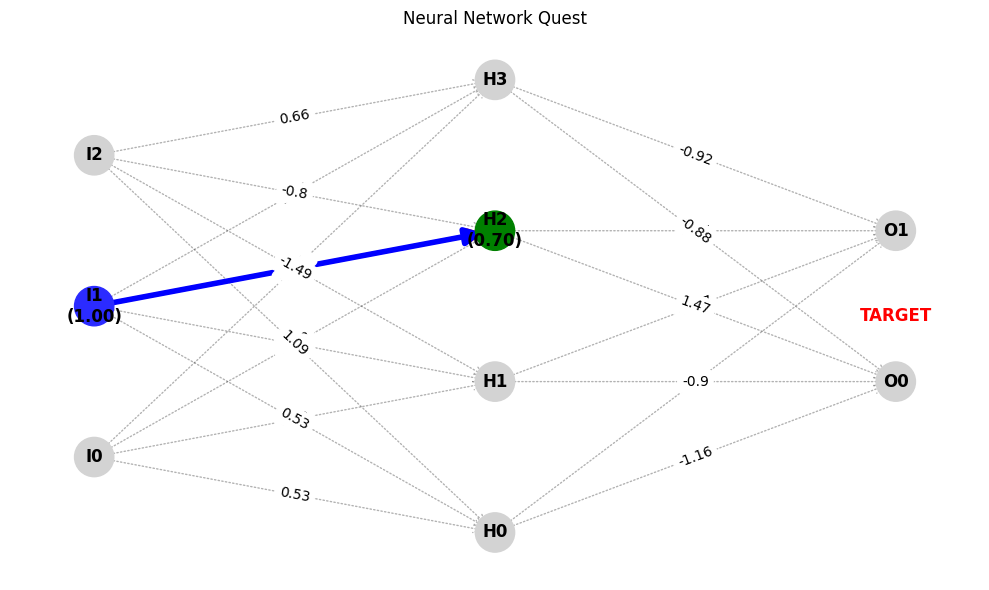


Current node: H2 with activation: 0.70
Choose one of the connections to a node in the output layer:
1. To O0 with weight 1.47
2. To O1 with weight 1.05


Enter the number of your chosen connection:  1


After moving along the connection with weight 1.47, your activation is now 1.03.


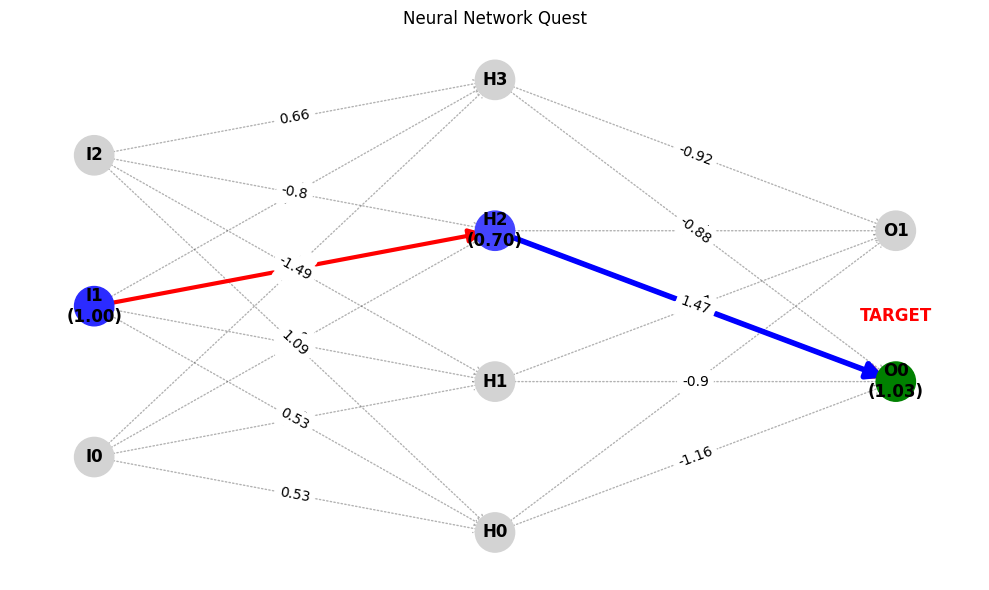

Congratulations! You reached the target output neuron O0 with activation 1.03.


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

random.seed(42)

layers = {
    "input": [f"I{i}" for i in range(3)],
    "hidden": [f"H{i}" for i in range(4)],
    "output": [f"O{i}" for i in range(2)]
}

G = nx.DiGraph()

for layer_name, nodes in layers.items():
    for node in nodes:
        G.add_node(node, layer=layer_name)

def random_weight():
    if random.random() < 0.7:
        return round(random.uniform(0.5, 1.5), 2)
    else:
        return round(random.uniform(-1.5, -0.5), 2)

edge_weights = {}
for i_node in layers["input"]:
    for h_node in layers["hidden"]:
        w = random_weight()
        G.add_edge(i_node, h_node, weight=w)
        edge_weights[(i_node, h_node)] = w
for h_node in layers["hidden"]:
    for o_node in layers["output"]:
        w = random_weight()
        G.add_edge(h_node, o_node, weight=w)
        edge_weights[(h_node, o_node)] = w

target_output = random.choice(layers["output"])


def draw_network(current_node=None, activation_history=None, chosen_edge=None, path_edges=None):
    """
    Draws the neural network with enhanced visualization.
    
    Parameters:
      - current_node: the node where the signal is currently located.
      - activation_history: dictionary mapping node -> activation value.
      - chosen_edge: the last edge chosen (tuple: (u,v)).
      - path_edges: list of edges that form the traversed path.
    """
    plt.figure(figsize=(10, 6))
    
    pos = {}
    layer_positions = {"input": 0, "hidden": 1, "output": 2}
    layer_counts = {layer: len(nodes) for layer, nodes in layers.items()}
    for layer, nodes in layers.items():
        for i, node in enumerate(nodes):
            pos[node] = (layer_positions[layer], i - (layer_counts[layer]-1)/2)
    
    nx.draw_networkx_edges(G, pos, alpha=0.3, style='dotted', arrows=True, arrowstyle='->', arrowsize=15)
    
    if path_edges:
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red',
                               width=3, arrowstyle='-|>', arrowsize=20)
    
    if chosen_edge:
        nx.draw_networkx_edges(G, pos, edgelist=[chosen_edge], edge_color='blue',
                               width=4, style='solid', arrowstyle='-|>', arrowsize=25)
    
    node_colors = []
    labels = {}
    for node in G.nodes():
        if node == current_node:
            color = 'green'
        elif activation_history and node in activation_history:
            act = activation_history[node]
            norm = min(max(act / 1.5, 0), 1)
            color = (0.5 - norm*0.5, 0.5 - norm*0.5, 1)  
        else:
            color = 'lightgrey'
        node_colors.append(color)
        if activation_history and node in activation_history:
            labels[node] = f"{node}\n({activation_history[node]:.2f})"
        else:
            labels[node] = node
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)
    nx.draw_networkx_labels(G, pos, labels=labels, font_weight='bold')
    
    edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    if target_output in pos:
        x, y = pos[target_output]
        plt.text(x, y + 0.4, 'TARGET', fontsize=12, color='red',
                 horizontalalignment='center', fontweight='bold')
    
    plt.title("Neural Network Quest")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


def play_game():
    print("Welcome to Neural Network Quest!")
    print("Your mission: guide your signal from an input neuron to the target output neuron.")
    print(f"Target Output Neuron: {target_output}")
    print("At each step, choose a connection. Your activation gets multiplied by the connection's weight.")
    print("Keep your activation above 0.2 to survive the journey.\n")
    
    
    print("Input Neurons:")
    for i, node in enumerate(layers["input"]):
        print(f"{i+1}. {node}")
    start_choice = input("Choose your starting input neuron (enter number): ")
    try:
        start_idx = int(start_choice) - 1
        current_node = layers["input"][start_idx]
    except:
        print("Invalid choice. Defaulting to the first input neuron.")
        current_node = layers["input"][0]
    
    activation = 1.0  
    activation_history = {current_node: activation}
    traversed_path = []  
    
    draw_network(current_node=current_node, activation_history=activation_history)
    
    for next_layer in ["hidden", "output"]:
        possible_edges = [(current_node, v) for v in G.successors(current_node)]
        if not possible_edges:
            print("No outgoing connections! Your signal is lost.")
            return
        
        print(f"\nCurrent node: {current_node} with activation: {activation:.2f}")
        print(f"Choose one of the connections to a node in the {next_layer} layer:")
        for idx, (u, v) in enumerate(possible_edges):
            w = G[u][v]['weight']
            print(f"{idx+1}. To {v} with weight {w}")
        
        choice = input("Enter the number of your chosen connection: ")
        try:
            choice_idx = int(choice) - 1
            chosen_edge = possible_edges[choice_idx]
        except:
            print("Invalid choice. Taking the first available connection.")
            chosen_edge = possible_edges[0]
        
        weight = G[chosen_edge[0]][chosen_edge[1]]['weight']
        activation *= weight
        current_node = chosen_edge[1]
        activation_history[current_node] = activation
        traversed_path.append(chosen_edge)
        
        print(f"After moving along the connection with weight {weight}, your activation is now {activation:.2f}.")
        if activation < 0.2:
            print("Your activation has dropped too low. The signal dies. Game Over!")
            draw_network(current_node=current_node,
                         activation_history=activation_history,
                         chosen_edge=chosen_edge,
                         path_edges=traversed_path)
            return
        
        draw_network(current_node=current_node,
                     activation_history=activation_history,
                     chosen_edge=chosen_edge,
                     path_edges=traversed_path)
    
    if current_node == target_output:
        print(f"Congratulations! You reached the target output neuron {target_output} with activation {activation:.2f}.")
    else:
        print(f"You reached output neuron {current_node} which is not the target ({target_output}). Game Over!")
        draw_network(current_node=current_node,
                     activation_history=activation_history,
                     path_edges=traversed_path)


if __name__ == "__main__":
    play_game()
